<h1><b>Importing libraries</b></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as gp
import plotly.express as px
import plotly.graph_objects as go

from fbprophet import Prophet

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



<h1><b>Reading the data</b></h1>



In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
cd gdrive/

/content/gdrive


In [4]:
covid_ind_df=pd.read_csv("/content/gdrive/My Drive/datasets/Daily_India_covid-19.csv")

In [5]:
covid_ind_df.head(20)

,Daily Confirmed,Daily Deaths,Daily Recovered,Date,Total Confirmed,Total Deaths,Total Recovered,Total Active
0,1,0,0,30 January,1,0,0,1
1,0,0,0,31 January,1,0,0,1
2,0,0,0,01 February,1,0,0,1
3,1,0,0,02 February,2,0,0,2
4,1,0,0,03 February,3,0,0,3
5,0,0,0,04 February,3,0,0,3
6,0,0,0,05 February,3,0,0,3
7,0,0,0,06 February,3,0,0,3
8,0,0,0,07 February,3,0,0,3
9,0,0,0,08 February,3,0,0,3


In [6]:
covid_ind_df.dtypes

Daily Confirmed     int64
Daily Deaths        int64
Daily Recovered     int64
Date               object
Total Confirmed     int64
Total Deaths        int64
Total Recovered     int64
Total Active        int64
dtype: object

In [7]:
state_df=pd.read_csv("/content/gdrive/My Drive/datasets/state_level_latest.csv")

In [8]:
state_df

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Total,970169,613735,24929,331116,16/07/2020 00:16:58,389,TT,32607,20646,614,NaN
1,Maharashtra,275640,152613,10928,111801,15/07/2020 19:43:06,298,MH,7975,3606,233,298 cases were marked as non-covid deaths in M...
2,Tamil Nadu,151820,102310,2167,47343,15/07/2020 19:18:00,0,TN,4496,5000,68,2 deaths cross notified to other states from C...
3,Delhi,116993,95699,3487,17807,15/07/2020 20:54:01,0,DL,1647,2463,41,[July 14]: Value for the total tests conducted...
4,Gujarat,44648,31346,2080,11222,15/07/2020 20:17:01,0,GJ,925,791,10,NaN
5,Karnataka,47253,18467,933,27849,15/07/2020 21:48:02,4,KA,3176,1076,87,4 cases are classified as non-covid related de...
6,Uttar Pradesh,41383,25743,1012,14628,15/07/2020 21:48:06,0,UP,1659,762,29,NaN
7,Telangana,39342,25999,386,12957,15/07/2020 22:38:01,0,TG,1597,1159,11,NaN
8,Andhra Pradesh,35451,18378,452,16621,15/07/2020 16:39:59,0,AP,2432,911,44,Total includes patients from other states and ...
9,West Bengal,34427,20680,1000,12747,15/07/2020 19:43:16,0,WB,1589,749,20,NaN


In [9]:
testing=pd.read_csv("/content/gdrive/My Drive/datasets/StatewiseTestingDetails.csv")

In [10]:
testing.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [11]:
pos=testing["Positive"].sum()
pos

24418716.0

In [12]:
df_spread=pd.read_csv("/content/gdrive/My Drive/datasets/complete.csv")
df_spread.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1,0,0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1,0,0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2,0,0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3,0,0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3,0,0,0,0,0


In [13]:
df_spread.info()
df_spread.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3965 entries, 0 to 3964
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       3965 non-null   object 
 1   Name of State / UT         3965 non-null   object 
 2   Latitude                   3965 non-null   float64
 3   Longitude                  3965 non-null   float64
 4   Total Confirmed cases      3965 non-null   int64  
 5   Death                      3965 non-null   int64  
 6   Cured/Discharged/Migrated  3965 non-null   int64  
 7   New cases                  3965 non-null   int64  
 8   New deaths                 3965 non-null   int64  
 9   New recovered              3965 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 309.9+ KB


,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
3960,2020-07-16,Telangana,18.1124,79.0193,39342,386,25999,1597,11,1159
3961,2020-07-16,Tripura,23.9408,91.9882,2268,3,1604,98,1,66
3962,2020-07-16,Uttar Pradesh,26.8467,80.9462,41383,1012,25743,1659,29,760
3963,2020-07-16,Uttarakhand,30.0668,79.0193,3785,50,2948,99,0,81
3964,2020-07-16,West Bengal,22.9868,87.8550,34427,1000,20680,1589,20,749


In [14]:
testing.dtypes

Date             object
State            object
TotalSamples    float64
Negative         object
Positive        float64
dtype: object

In [15]:
individuals_df=pd.read_csv("/content/gdrive/My Drive/datasets/IndividualDetails.csv")
individuals_df.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


In [16]:
population=pd.read_csv("/content/gdrive/My Drive/datasets/population_india_census2011.csv")
population.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [17]:
world=pd.read_csv("/content/gdrive/My Drive/datasets/full_grouped.csv")

In [18]:
world.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [19]:
country_df=pd.read_csv("/content/gdrive/My Drive/datasets/Total_World_covid-19.csv")
country_df.head()

,Country,Confirmed,Deaths,Recovered,Active,Critical,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population
0,USA,3479483,138247.0,1549469.0,1791767.0,15934.0,10510.0,418.0,43252833.0,130645.0,3.310711e+08
1,Brazil,1887959,72921.0,1213512.0,601526.0,8318.0,8880.0,343.0,4572796.0,21508.0,2.126118e+08
2,India,907645,23727.0,572112.0,311806.0,8944.0,657.0,17.0,12092503.0,8760.0,1.380456e+09
3,Russia,733699,11439.0,504021.0,218239.0,2300.0,5028.0,78.0,23200000.0,158973.0,1.459368e+08
4,Peru,330123,12054.0,221008.0,97061.0,1314.0,10008.0,365.0,1943679.0,58924.0,3.298619e+07


In [20]:
total_cases= country_df['Confirmed'].sum()
total_cases

13240715

<h1><b>Covid-19 Symptoms </b></h1>



In [21]:
symptoms={'symptom':['Fever',
        'Dry cough',
        'Fatigue',
        'Sputum production',
        'Shortness of breath',
        'Muscle pain',
        'Sore throat',
        'Headache',
        'Chills',
        'Nausea or vomiting',
        'Nasal congestion',
        'Diarrhoea',
        'Haemoptysis',
        'Conjunctival congestion'],
        'percentage':[87.9,67.7,38.1,33.4,18.6,14.8,13.9,13.6,11.4,5.0,4.8,3.7,0.9,0.8]}

symptoms=pd.DataFrame(data=symptoms,index=range(14))
symptoms


,symptom,percentage
0,Fever,87.9
1,Dry cough,67.7
2,Fatigue,38.1
3,Sputum production,33.4
4,Shortness of breath,18.6
5,Muscle pain,14.8
6,Sore throat,13.9
7,Headache,13.6
8,Chills,11.4
9,Nausea or vomiting,5.0


In [22]:
fig = px.bar(symptoms[['symptom', 'percentage']].sort_values('percentage', ascending=False), 
             x="percentage", y="symptom", color='symptom',title='Symptom of Coronavirus',orientation='h')

fig.update_layout(barmode='stack')
fig.update_layout(yaxis_title='Symptoms',xaxis_title='Percentages')
fig.update_layout(template = 'plotly_white')
fig.show()

<h1><b><i>World Wide Insights </i></b><h1>

In [23]:
confirmed = world.groupby('Date').sum()['Confirmed'].reset_index()
deaths = world.groupby('Date').sum()['Deaths'].reset_index()
recovered = world.groupby('Date').sum()['Recovered'].reset_index()

In [24]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

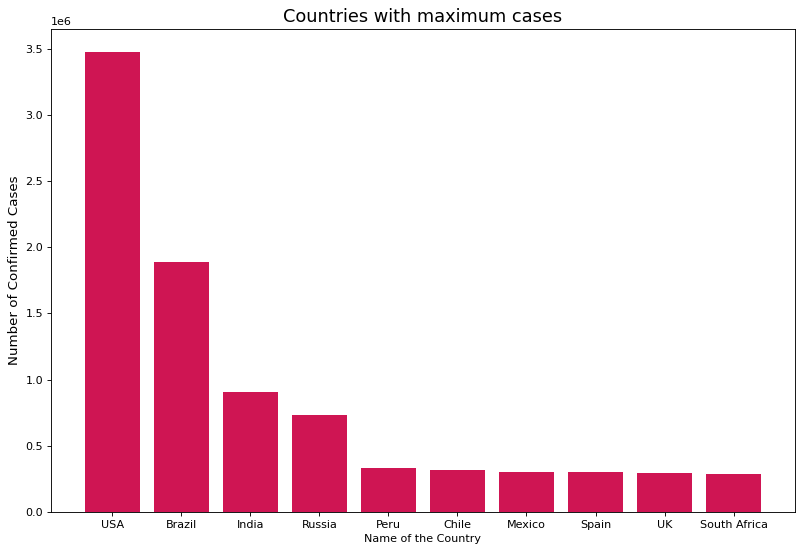

In [25]:
plt.figure(figsize=(12,8), dpi=80)
plt.bar(country_df['Country'][:10], country_df['Confirmed'][:10],
        align='center',color='#cf1553')
plt.xlabel('Name of the Country')
plt.ylabel('Number of Confirmed Cases', size = 12)
plt.title('Countries with maximum cases', size = 16)
plt.show()

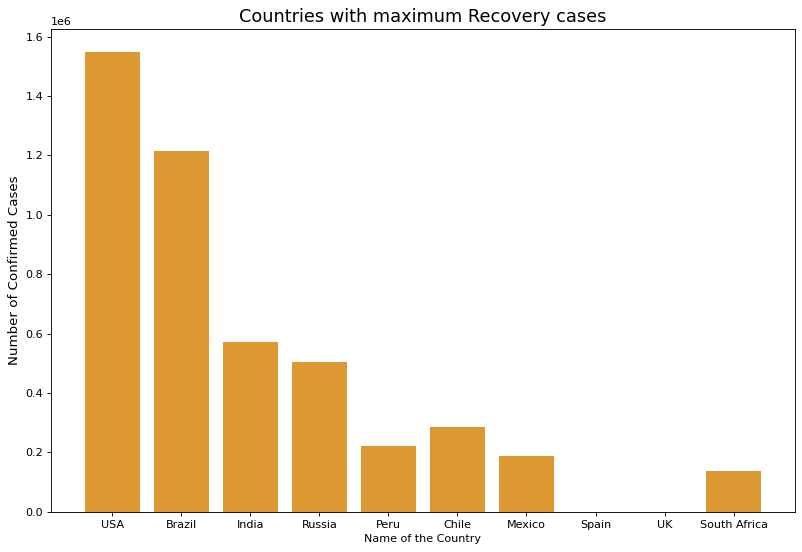

In [26]:
plt.figure(figsize=(12,8), dpi=80)
plt.bar(country_df['Country'][:10], country_df['Recovered'][:10],
        align='center',color='#db9730')
plt.xlabel('Name of the Country')
plt.ylabel('Number of Confirmed Cases', size = 12)
plt.title('Countries with maximum Recovery cases', size = 16)
plt.show()
#Inaccurate due to missing values 

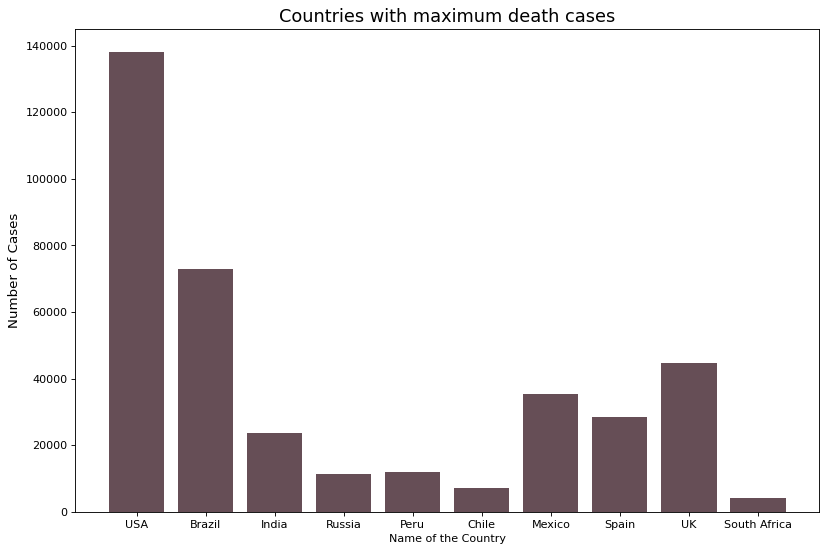

In [27]:
plt.figure(figsize=(12,8), dpi=80)
plt.bar(country_df['Country'][:10], country_df['Deaths'][:10],
        align='center',color='#664e56')
plt.xlabel('Name of the Country')
plt.ylabel('Number of Cases', size = 12)
plt.title('Countries with maximum death cases', size = 16)
plt.show()

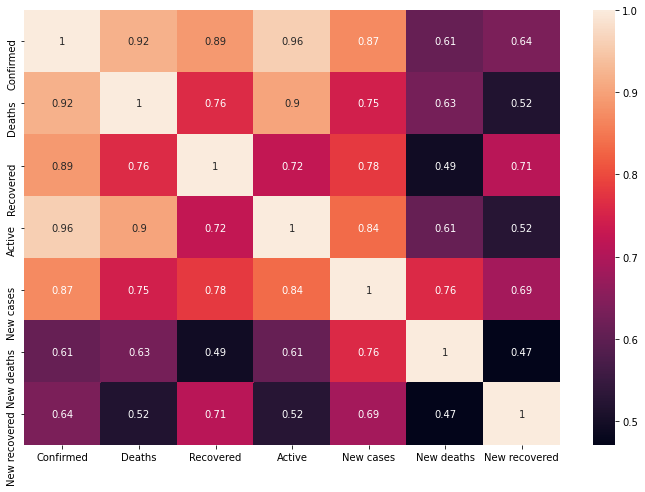

In [28]:
#Corelation amoung 7 different columns in the world wide dataset
plt.figure(figsize = (12,8))
sns.heatmap(world.corr(), annot=True)

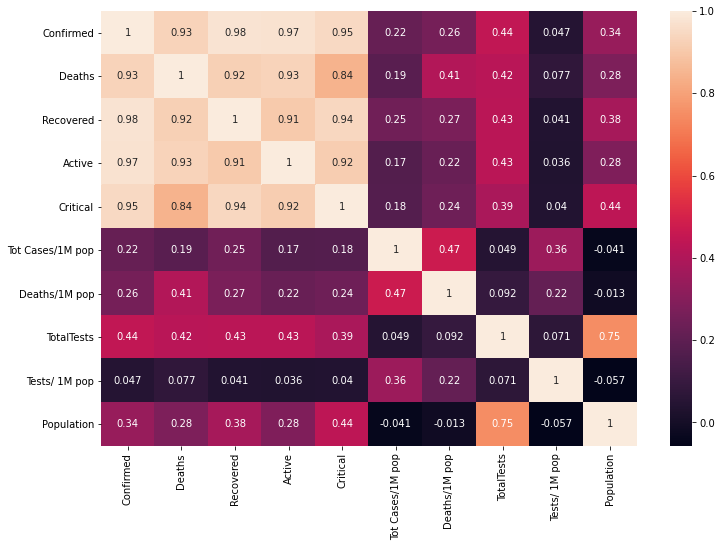

In [29]:
#Corelation among the 10 different columns in the country dataset
#Factors such as population and testing done are considered here
plt.figure(figsize = (12,8))
sns.heatmap(country_df.corr(), annot=True)


<h1><b><i>Trend of Corona Virus Cases Observed In India </i></b><h1>

In [30]:
#The number of samples tested over time
temp= testing.groupby('Date')['TotalSamples'].sum().reset_index()

fig = px.bar(temp, x="Date", y="TotalSamples", color='TotalSamples', color_discrete_sequence = px.colors.sequential.Blackbody_r, 
             orientation='v', height=600,
             title='Number of covid-19 tests conducted in India')

#fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [31]:
#Trent of death,recovered and confirmed cases in India over time
fig = gp.Figure(data=[
gp.Bar(name='Deaths', x=covid_ind_df['Date'], y=covid_ind_df['Total Deaths'],marker_color='red'),
gp.Bar(name='Recovered Cases', x=covid_ind_df['Date'], y=covid_ind_df['Total Recovered'],marker_color='green'),
gp.Bar(name='Confirmed Cases', x=covid_ind_df['Date'], y=covid_ind_df['Total Confirmed'],marker_color='blue')])

fig.update_layout(barmode='stack')
fig.update_layout(title_text='Covid-19 Death,Recovery and Confirmed Cases in India' )
fig.show()

In [32]:
#Trend of death,recovered and confirmed cases on daily basis in India
fig = gp.Figure(data=[
gp.Bar(name='Daily Deaths', x=covid_ind_df['Date'], y=covid_ind_df['Daily Deaths'],marker_color='#1b6b0f'),
gp.Bar(name='Daily Recovered ', x=covid_ind_df['Date'], y=covid_ind_df['Daily Recovered'],marker_color='#dba935'),
gp.Bar(name='Daily Confirmed', x=covid_ind_df['Date'], y=covid_ind_df['Daily Confirmed'],marker_color='#db1866')])

fig.update_layout(barmode='stack')
fig.update_layout(title_text='Covid-19 Death,Recovery and Confirmed Cases in India on daily basis' )
fig.show()

In [33]:
# Rise of COVID-19 cases in India
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=covid_ind_df['Date'], y = covid_ind_df['Total Confirmed'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India Over Time ' ,plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [34]:
fig = px.line(covid_ind_df, x="Date", y="Total Confirmed", 
              title="Confirmed Cases (Logarithmic Scale) Over Time in India", 
              log_y=True,template='gridon',width=600, height=600)
fig.show()

In [35]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=covid_ind_df['Date'], y = covid_ind_df['Total Active'], mode='lines+markers',name='Total Cases',line=dict(color='#72edcc', width=2)))
fig.update_layout(title_text='Trend of Coronavirus Active Cases in India Over Time ' ,plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [36]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=covid_ind_df['Date'], y = covid_ind_df['Total Deaths'], mode='lines+markers',name='Total Cases',  line=dict(color='#b81c21', width=2)))
fig.update_layout(title_text='Trend of Coronavirus Deaths Cases in India Over Time ' ,plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [37]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=covid_ind_df['Date'], y=covid_ind_df['Total Recovered'], mode='lines+markers', name='Recovered',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=covid_ind_df['Date'], y=covid_ind_df['Total Active'], mode='lines+markers', name='Active', line=dict(color='orange', width=2)))

fig.update_layout(title='Recovered versus Active Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of cases'))

fig.show()

In [38]:
df_spread['Name of State / UT'] = df_spread['Name of State / UT'].str.replace('Union Territory of ', '')
df_spread = df_spread[['Date', 'Name of State / UT', 'Latitude', 'Longitude', 'Total Confirmed cases', 'Death', 'Cured/Discharged/Migrated']]
df_spread.columns = ['Date', 'State/UT', 'Latitude', 'Longitude', 'Confirmed', 'Deaths', 'Cured']

for i in ['Confirmed', 'Deaths', 'Cured']:
    df_spread[i] = df_spread[i].astype('int')
    
df_spread['Active'] = df_spread['Confirmed'] - df_spread['Deaths'] - df_spread['Cured']
df_spread['Mortality rate'] = df_spread['Deaths']/df_spread['Confirmed']
df_spread['Recovery rate'] = df_spread['Cured']/df_spread['Confirmed']

df_spread = df_spread[['Date', 'State/UT', 'Latitude', 'Longitude', 'Confirmed', 'Active', 'Deaths', 'Mortality rate', 'Cured', 'Recovery rate']]

In [39]:
import plotly.express as px
fig = px.bar(covid_ind_df, x="Date", y="Daily Confirmed", barmode='group',height=500)
fig.update_layout(title_text='New COVID-19 cases reported daily in India',plot_bgcolor='rgb(275, 270, 273)')
fig.show()

In [40]:

fig = px.bar(covid_ind_df, x="Date", y="Daily Recovered", barmode='group',height=500, color_discrete_sequence = ['#5fb325'])
fig.update_layout(title_text='New COVID-19 Recovered cases reported daily in India',plot_bgcolor='rgb(275, 270, 273)')
fig.show()

In [41]:

fig = px.bar(covid_ind_df, x="Date", y="Daily Deaths", barmode='group',height=500, color_discrete_sequence = ['#cf232c'])
fig.update_layout(title_text='New COVID-19 Death cases reported daily in India',plot_bgcolor='rgb(275, 270, 273)')
fig.show()

In [42]:
positive= testing.groupby('Date')['Positive'].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=positive['Date'], y=positive['Positive'],
                    mode='lines+markers',marker_color='rgb(168, 131, 50)'))
fig.update_layout(title_text = 'Trend of Positive case ratio from tested people of India')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=600, height=600)
fig.show()

In [43]:
testing['Negative'] = pd.to_numeric(testing['Negative'],errors='coerce')
testing['Negative']=testing['Negative'].replace(np.nan,0,regex=True)

negative= testing.groupby('Date')['Negative'].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=negative['Date'], y=negative['Negative'],
                    mode='lines+markers',marker_color='rgb(168, 131, 50)'))
fig.update_layout(title_text = 'Trend of Negative case ratio from tested people of India')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=600, height=600)
fig.show()

In [44]:
covid_ind_df['Recovery Rate'] = covid_ind_df['Total Recovered']/covid_ind_df['Total Confirmed']*100
fig = go.Figure()
fig.add_trace(go.Scatter(x=covid_ind_df['Date'], y=covid_ind_df['Recovery Rate'],
                    mode='lines+markers',marker_color='#436b41'))
fig.update_layout(title_text = 'Trend of Recovery Rate of India')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=600, height=600)
fig.show()

In [45]:
covid_ind_df['Mortality Rate'] = covid_ind_df['Total Deaths']/covid_ind_df['Total Confirmed']*100
fig = go.Figure()
fig.add_trace(go.Scatter(x=covid_ind_df['Date'], y=covid_ind_df['Mortality Rate'],
                    mode='lines+markers',marker_color='#bf0b0b'))
fig.update_layout(title_text = 'Trend of Mortality Rate of India')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=600, height=600)
fig.show()

In [46]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=covid_ind_df['Date'], y=covid_ind_df['Daily Confirmed'],
                    mode='lines+markers',marker_color='#3ab7e0',name='Confimned Cases'))
fig.add_trace(go.Scatter(x=covid_ind_df['Date'],y=covid_ind_df['Daily Recovered'], 
                mode='lines+markers',marker_color='#eba91c',name='Recovered Cases'))
fig.update_layout(title_text = 'Newly Infected vs. Newly Recovered in India',plot_bgcolor='rgb(275, 270, 273)')
fig.show()

In [47]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=covid_ind_df['Date'], y=covid_ind_df['Recovery Rate'],
                    mode='lines+markers',marker_color='#a61738',name='Recovery Rate'))
fig.add_trace(go.Scatter(x=covid_ind_df['Date'],y=covid_ind_df['Mortality Rate'], 
                mode='lines+markers',marker_color='#151a99',name='Mortality Rate'))
fig.update_layout(title_text = 'Recovery Rate vs. Mortality Rate in India',plot_bgcolor='rgb(275, 270, 273)')
fig.show()

<h1><b><i>State Wise Insights</i></b></h1>

In [48]:
#Statewise samples tested in India
temp= testing.groupby('State')['TotalSamples'].sum().reset_index()

fig = px.bar(temp, x="State", y="TotalSamples", color='TotalSamples', color_discrete_sequence = px.colors.sequential.Blackbody_r, 
             orientation='v', height=600,
             title='Statewise samples tested in India')
fig.show()

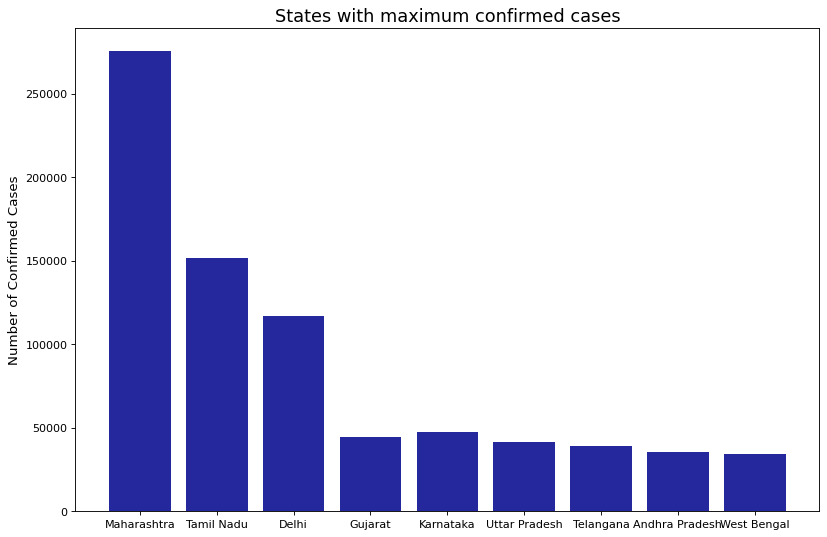

In [49]:
plt.figure(figsize=(12,8), dpi=80)
plt.bar(state_df['State'][1:10], state_df['Confirmed'][1:10],
        align='center',color='#24289c')
plt.ylabel('Number of Confirmed Cases', size = 12)
plt.title('States with maximum confirmed cases', size = 16)
plt.show()

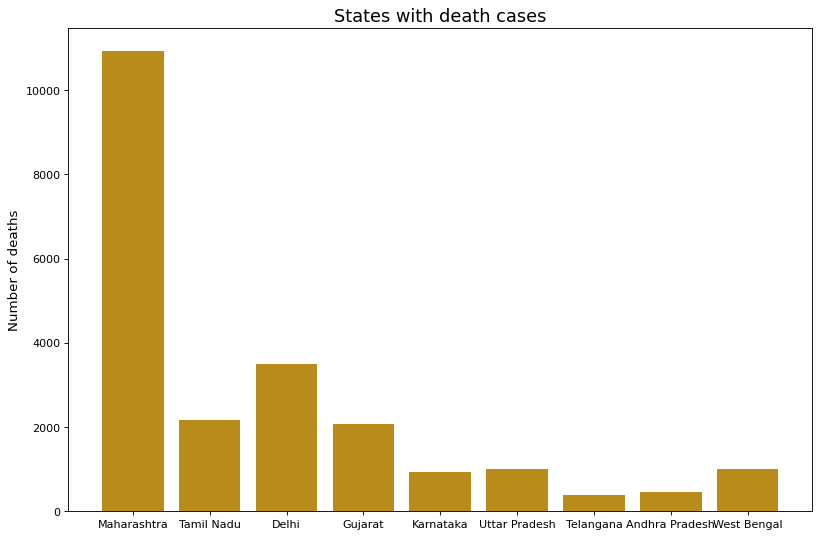

In [50]:
plt.figure(figsize=(12,8), dpi=80)
plt.bar(state_df['State'][1:10], state_df['Deaths'][1:10],
        align='center',color='#b88b1a')
plt.ylabel('Number of deaths', size = 12)
plt.title('States with death cases', size = 16)
plt.show()

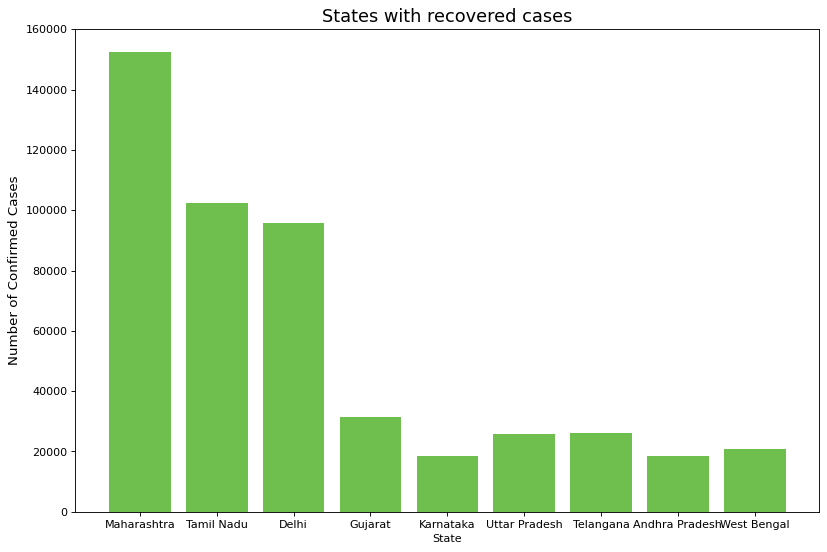

In [51]:
plt.figure(figsize=(12,8), dpi=80)
plt.bar(state_df['State'][1:10], state_df['Recovered'][1:10],
        align='center',color='#6ebf4e')
plt.xlabel('State')
plt.ylabel('Number of Confirmed Cases', size = 12)
plt.title('States with recovered cases', size = 16)
plt.show()

In [52]:
#Statewise spread of corona virus cases in India
df_india_data = df_spread[['Date', 'State/UT','Confirmed','Cured','Deaths']]
spread_confirmed = df_india_data.groupby(['Date','State/UT'])['Confirmed'].sum().reset_index().sort_values('Confirmed', ascending=True)

fig = px.area(spread_confirmed, x="Date", y="Confirmed",color='State/UT',title='State Wise Spread over time',height=500,
          color_discrete_sequence = px.colors.cyclical.Edge)
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=1500, height=800)
fig.show()

In [53]:
df_spread

,Date,State/UT,Latitude,Longitude,Confirmed,Active,Deaths,Mortality rate,Cured,Recovery rate
0,2020-01-30,Kerala,10.8505,76.2711,1,1,0,0.000000,0,0.000000
1,2020-01-31,Kerala,10.8505,76.2711,1,1,0,0.000000,0,0.000000
2,2020-02-01,Kerala,10.8505,76.2711,2,2,0,0.000000,0,0.000000
3,2020-02-02,Kerala,10.8505,76.2711,3,3,0,0.000000,0,0.000000
4,2020-02-03,Kerala,10.8505,76.2711,3,3,0,0.000000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
3960,2020-07-16,Telangana,18.1124,79.0193,39342,12957,386,0.009811,25999,0.660846
3961,2020-07-16,Tripura,23.9408,91.9882,2268,661,3,0.001323,1604,0.707231
3962,2020-07-16,Uttar Pradesh,26.8467,80.9462,41383,14628,1012,0.024454,25743,0.622067
3963,2020-07-16,Uttarakhand,30.0668,79.0193,3785,787,50,0.013210,2948,0.778864


In [54]:
spread_cured = df_india_data.groupby(['Date','State/UT'])['Cured'].sum().reset_index().sort_values('Cured', ascending=True)

fig = px.area(spread_cured, x="Date", y="Cured",color='State/UT',title='State Wise Recovered cases over time',height=500,
          color_discrete_sequence = px.colors.cyclical.Edge)
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=1200, height=800)
fig.show()

In [55]:
spread_death = df_india_data.groupby(['Date','State/UT'])['Deaths'].sum().reset_index().sort_values('Deaths', ascending=True)

fig = px.area(spread_death, x="Date", y="Deaths",color='State/UT',title='State Wise Deaths over time',height=500,
          color_discrete_sequence = px.colors.cyclical.Edge)
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=1200, height=800)
fig.show()

<h1><b><i>Gender and Age wise insights</i></b></h1>

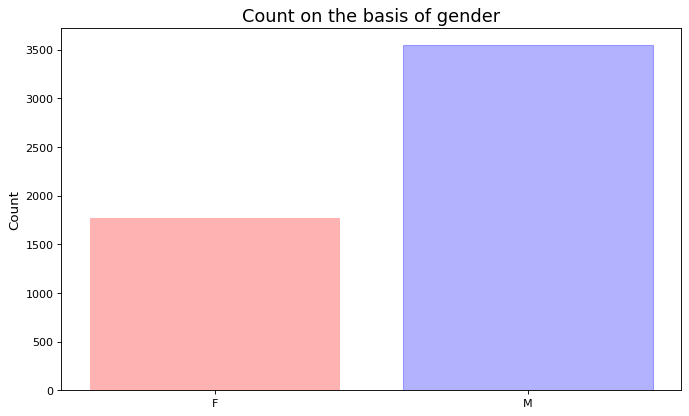

In [56]:
individuals_grouped_gender = individuals_df.groupby('gender')
individuals_grouped_gender = pd.DataFrame(individuals_grouped_gender.size().reset_index(name = "count"))
individuals_grouped_gender.head()
plt.figure(figsize=(10,6), dpi=80)
barlist = plt.bar(individuals_grouped_gender['gender'], individuals_grouped_gender['count'], align = 'center', color='red', alpha=0.3)
barlist[1].set_color('blue')
plt.ylabel('Count', size=12)
plt.title('Count on the basis of gender', size=16)
plt.show()

In [57]:
individuals_df.columns

Index(['id', 'government_id', 'diagnosed_date', 'age', 'gender',
       'detected_city', 'detected_district', 'detected_state', 'nationality',
       'current_status', 'status_change_date', 'notes'],
      dtype='object')

In [58]:
from plotly.subplots import make_subplots
fig = make_subplots(
    rows=1, cols=2, column_widths=[0.8, 0.2],
    subplot_titles = ['Gender vs Age', ''],
    specs=[[{"type": "histogram"}, {"type": "pie"}]]
)

temp = individuals_df[['age', 'gender']].dropna()

gen_grp = temp.groupby('gender').count()

fig.add_trace(go.Histogram(x=temp[temp['gender']=='F']['age'], nbinsx=50, name='Female', marker_color='#e0ae38'), 1, 1)
fig.add_trace(go.Histogram(x=temp[temp['gender']=='M']['age'], nbinsx=50, name='Male', marker_color='#47ad62'), 1, 1)

fig.add_trace(go.Pie(values=gen_grp.values.reshape(-1).tolist(), labels=['Female', 'Male'], marker_colors = ['#e0ae38','#47ad62']),1, 2)

fig.update_layout(showlegend=False)
fig.update_layout(barmode='stack')
fig.data[2].textinfo = 'label+text+value+percent'

fig.show()

In [59]:
age_wise = individuals_df[['status_change_date','age','current_status','gender','detected_state']].dropna()
rec = age_wise[age_wise['current_status'] == 'Recovered'].drop('current_status',axis =1).sort_values('status_change_date',ascending=True)
rec_x = rec['age'].astype(int)
rec_y = rec['gender']
fig = px.histogram(x=rec_x,color =rec_y,orientation = 'v',
                   title='Age wise Recovered cases in Male and Female')
fig.update_layout(barmode='stack')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',yaxis_title='Recovered',xaxis_title='Age Group')
fig.show()

In [60]:
age_wise=individuals_df.copy()
age_wise = individuals_df[['status_change_date','age','current_status','gender','detected_state']].dropna()
rec = age_wise[age_wise['current_status'] == 'Deceased'].drop('current_status',axis =1).sort_values('status_change_date',ascending=True)

rec_x = rec['age'].astype(int)
rec_y = rec['gender']

fig = px.histogram(x=rec_x,color =rec_y,orientation = 'v',
                   title='Age wise Death cases in Male and Female')
fig.update_layout(barmode='stack')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',yaxis_title='Deaths',xaxis_title='Age Group')
fig.show()

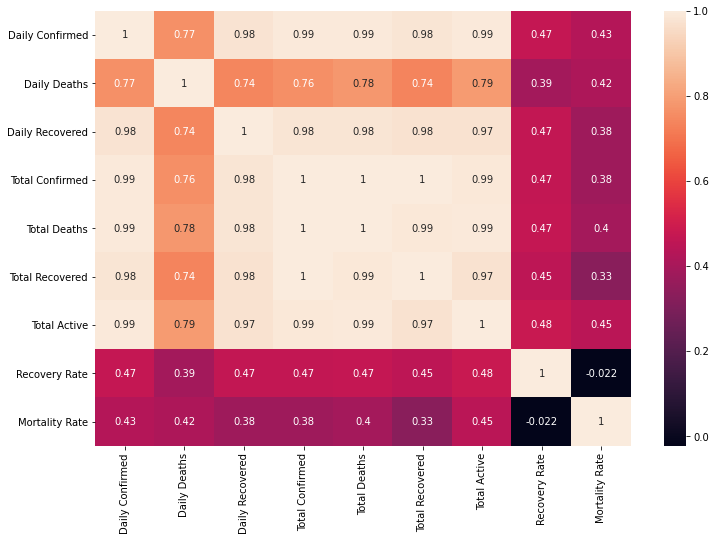

In [61]:
#Corelation among different columns in the india dataset
plt.figure(figsize = (12,8))
sns.heatmap(covid_ind_df.corr(), annot=True)

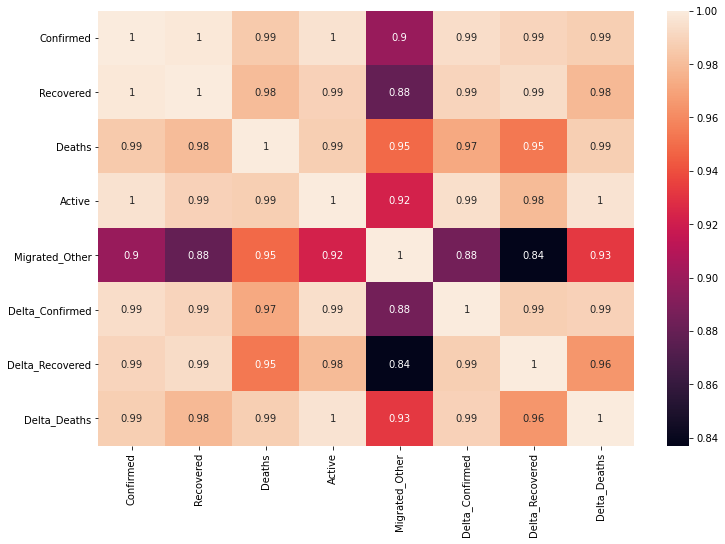

In [62]:
plt.figure(figsize = (12,8))
sns.heatmap(state_df.corr(), annot=True)

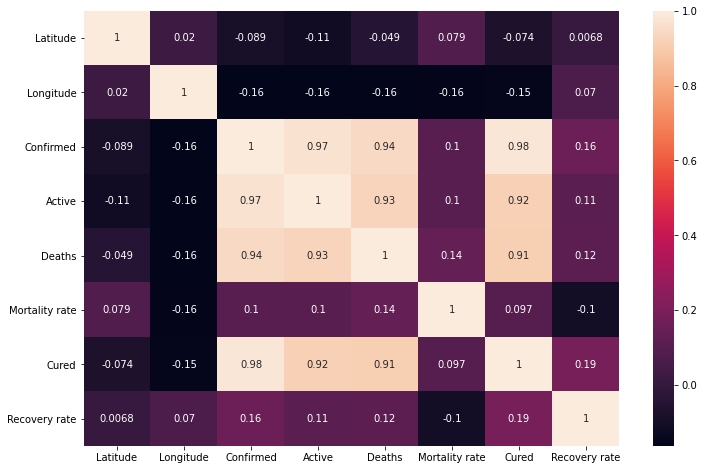

In [63]:
plt.figure(figsize = (12,8))
sns.heatmap(df_spread.corr(), annot=True)

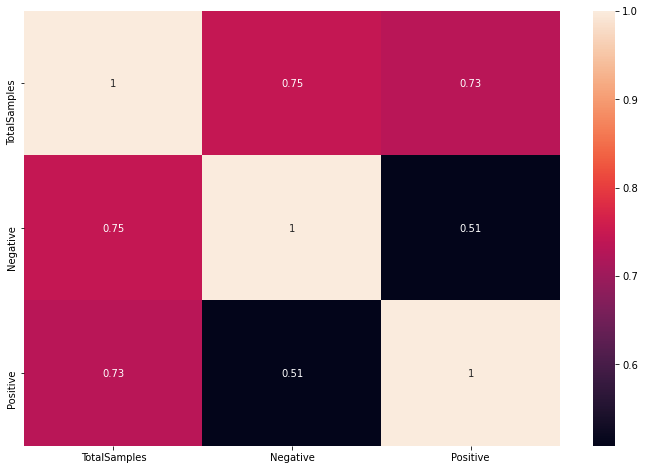

In [64]:
plt.figure(figsize = (12,8))
sns.heatmap(testing.corr(), annot=True)

In [65]:
states=state_df[['State','Confirmed','Deaths','Recovered','Active','Last_Updated_Time']]
popul=population[['State / Union Territory','Population','Area','Density']]
popul.columns=['State','Population','Area','Density']

In [66]:
covid19_df_latest = pd.merge(states, popul, on="State")
covid19_df_latest['Cases/10million'] = (covid19_df_latest['Confirmed']/covid19_df_latest['Population'])*10000000
covid19_df_latest


,State,Confirmed,Deaths,Recovered,Active,Last_Updated_Time,Population,Area,Density,Cases/10million
0,Maharashtra,275640,10928,152613,111801,15/07/2020 19:43:06,112374333,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),24528.732909
1,Tamil Nadu,151820,2167,102310,47343,15/07/2020 19:18:00,72147030,"130,058 km2 (50,216 sq mi)","555/km2 (1,440/sq mi)",21043.139267
2,Delhi,116993,3487,95699,17807,15/07/2020 20:54:01,16787941,"1,484 km2 (573 sq mi)","11,297/km2 (29,260/sq mi)",69688.712868
3,Gujarat,44648,2080,31346,11222,15/07/2020 20:17:01,60439692,"196,024 km2 (75,685 sq mi)",308/km2 (800/sq mi),7387.198466
4,Karnataka,47253,933,18467,27849,15/07/2020 21:48:02,61095297,"191,791 km2 (74,051 sq mi)",319/km2 (830/sq mi),7734.310548
5,Uttar Pradesh,41383,1012,25743,14628,15/07/2020 21:48:06,199812341,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",2071.093296
6,Andhra Pradesh,35451,452,18378,16621,15/07/2020 16:39:59,49577103,"162,968 km2 (62,922 sq mi)",303/km2 (780/sq mi),7150.680023
7,West Bengal,34427,1000,20680,12747,15/07/2020 19:43:16,91276115,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",3771.742476
8,Rajasthan,26437,530,19502,6405,15/07/2020 22:15:16,68548437,"342,239 km2 (132,139 sq mi)",201/km2 (520/sq mi),3856.688957
9,Haryana,23306,319,17667,5320,15/07/2020 21:48:09,25351462,"44,212 km2 (17,070 sq mi)","573/km2 (1,480/sq mi)",9193.158170


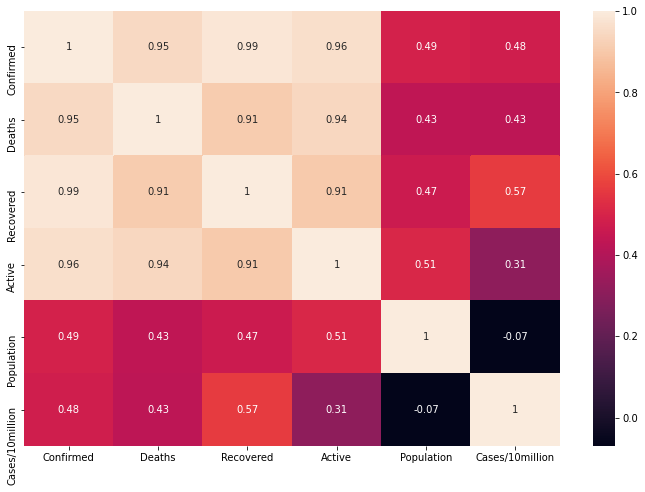

In [67]:
plt.figure(figsize = (12,8))
sns.heatmap(covid19_df_latest.corr(), annot=True)

<h1><b>Predictions </b><h1>


Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.

We use Prophet, a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [68]:
from fbprophet import Prophet

In [69]:

df_spread['Date']=pd.to_datetime(df_spread['Date'])


The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [70]:
df_spread.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3965 entries, 0 to 3964
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            3965 non-null   datetime64[ns]
 1   State/UT        3965 non-null   object        
 2   Latitude        3965 non-null   float64       
 3   Longitude       3965 non-null   float64       
 4   Confirmed       3965 non-null   int64         
 5   Active          3965 non-null   int64         
 6   Deaths          3965 non-null   int64         
 7   Mortality rate  3965 non-null   float64       
 8   Cured           3965 non-null   int64         
 9   Recovery rate   3965 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 309.9+ KB


In [71]:
confirmed = df_spread.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df_spread.groupby('Date').sum()['Deaths'].reset_index()
recovered = df_spread.groupby('Date').sum()['Cured'].reset_index()

In [72]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [73]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=30)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
190,2020-08-11
191,2020-08-12
192,2020-08-13
193,2020-08-14
194,2020-08-15


In [74]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
190,2020-08-11,1.361158e+06,1.288279e+06,1.444240e+06
191,2020-08-12,1.380982e+06,1.309702e+06,1.460232e+06
192,2020-08-13,1.398008e+06,1.310830e+06,1.482436e+06
193,2020-08-14,1.414914e+06,1.331989e+06,1.502683e+06
194,2020-08-15,1.432882e+06,1.340925e+06,1.523349e+06


The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

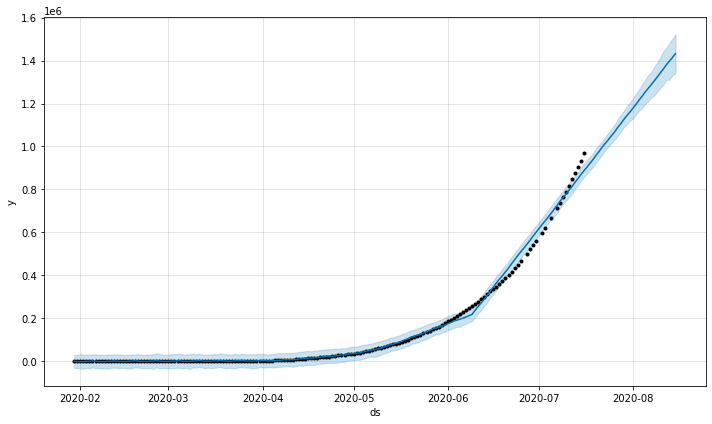

In [75]:
confirmed_forecast_plot = m.plot(forecast)

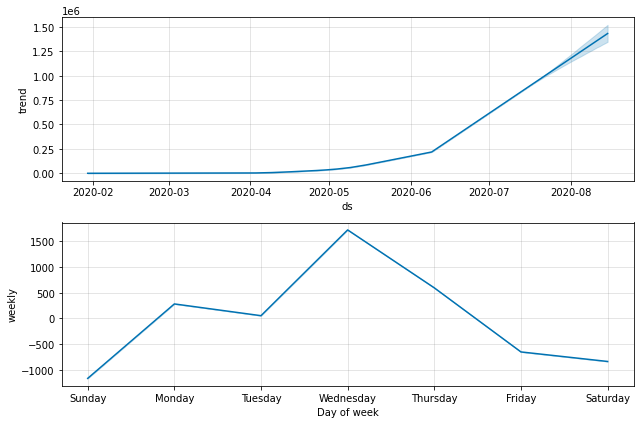

In [76]:
confirmed_forecast_plot =m.plot_components(forecast)

In [77]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [78]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=30)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
190,2020-08-11
191,2020-08-12
192,2020-08-13
193,2020-08-14
194,2020-08-15


In [79]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
190,2020-08-11,36531.385856,34863.441272,38139.663627
191,2020-08-12,37068.198711,35260.962710,38816.629118
192,2020-08-13,37516.962955,35668.525041,39369.537899
193,2020-08-14,37947.095227,36042.405679,39872.508732
194,2020-08-15,38418.906287,36332.972698,40336.606935


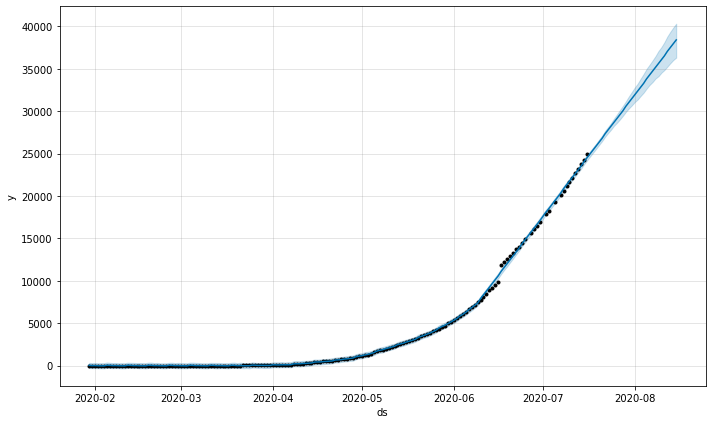

In [80]:
deaths_forecast_plot = m.plot(forecast)

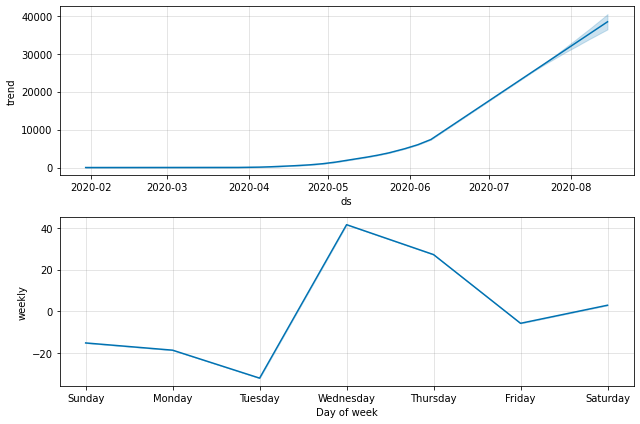

In [81]:
deaths_forecast_plot = m.plot_components(forecast)

In [82]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [83]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=30)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
190,2020-08-11
191,2020-08-12
192,2020-08-13
193,2020-08-14
194,2020-08-15


In [84]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
190,2020-08-11,880302.324748,833387.467441,925845.591558
191,2020-08-12,893934.193107,848853.484680,944260.241558
192,2020-08-13,905335.234230,854915.417737,956825.326011
193,2020-08-14,916997.457200,866120.190650,975062.600283
194,2020-08-15,929303.076140,872715.808118,988490.979489


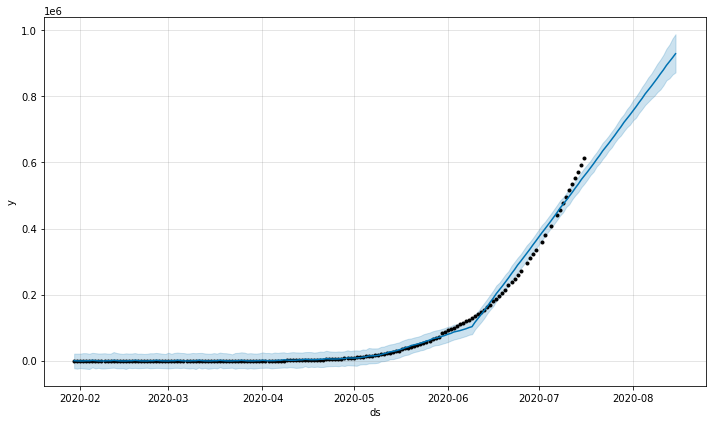

In [85]:
recovered_forecast_plot = m.plot(forecast)

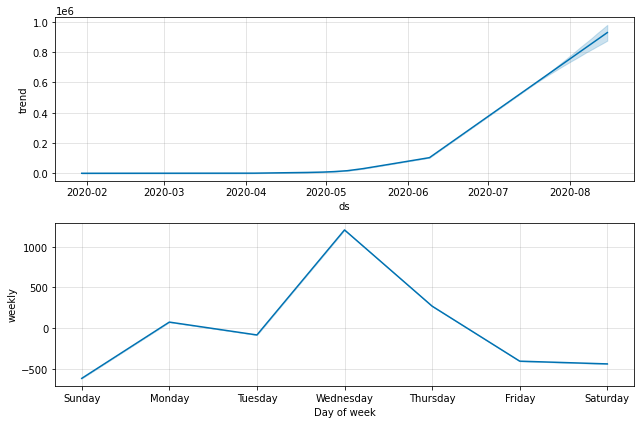

In [86]:
recovered_forecast_plot = m.plot_components(forecast)